In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize
from scipy.optimize import curve_fit

In [2]:
files=["IC40_exp_new.csv","IC59_exp_new.csv","IC79_exp_new.csv","IC86_I_exp_new.csv","IC86_II_exp_new.csv", 
       "IC86_III_exp_new.csv","IC86_IV_exp_new.csv","IC86_V_exp_new.csv","IC86_VI_exp.csv",
       "IC86_VII_exp.csv"]

In [3]:
data=np.loadtxt("IC40_exp_new.csv")
for name in files[1:]:#indexing the list
    da=np.loadtxt(name)
    data=np.vstack((data,da))#load everyfile
mjd,log10_E,Ang_err,RA,Dec,Azim,Zenith=data.T
len(RA)

1134431

In [4]:
fields=[log10_E,RA,Dec,Ang_err]
print(Ang_err)
iceang=fields[3]

[0.48 0.62 0.56 ... 0.3  0.21 0.25]


In [5]:
print(fields)

[array([3.31, 5.17, 3.92, ..., 2.88, 2.98, 3.28]), array([203.024,  75.024,  97.501, ..., 308.127, 332.199, 213.309]), array([ 16.76 , -13.371,  11.29 , ...,  42.543,  44.72 ,   4.708]), array([0.48, 0.62, 0.56, ..., 0.3 , 0.21, 0.25])]


In [6]:
df=pd.read_csv("chimefrb_all.csv")
print(df)

         tns_name    previous_name repeater_name      ra  ra_err ra_notes  \
0    FRB20180725A  180725.J0613+67         -9999   93.42   0.039    -9999   
1    FRB20180727A  180727.J1311+26         -9999  197.72   0.130    -9999   
2    FRB20180729A  180729.J1316+55         -9999  199.40   0.120    -9999   
3    FRB20180729B  180729.J0558+56         -9999   89.93   0.270    -9999   
4    FRB20180730A  180730.J0353+87         -9999   57.39   0.032    -9999   
..            ...              ...           ...     ...     ...      ...   
595  FRB20190701A            -9999         -9999  277.47   0.210    -9999   
596  FRB20190701B            -9999         -9999  302.93   0.220    -9999   
597  FRB20190701C            -9999         -9999   96.36   0.230    -9999   
598  FRB20190701D            -9999         -9999  112.10   0.180    -9999   
599  FRB20190701E            -9999         -9999  138.57   0.190    -9999   

       dec  dec_err dec_notes      gl  ...  sp_idx_err  sp_run  sp_run_err 

In [7]:
frb_ra=df["ra"]
frb_dec=df["dec"]


In [8]:
frb_ra=np.array(frb_ra)
frb_dec=np.array(frb_dec)
ice_ra=(fields[1])
ice_dec=(fields[2])
len(ice_ra)

1134431

In [13]:
ns1_values=[]
TS_values=[]
sqrt_TS=[]
for i in range(0,600):
    ra_frb=frb_ra[i]
    dec_frb=frb_dec[i]
    ra_frb_rad=np.radians(ra_frb)
    dec_frb_rad=np.radians(dec_frb)
    ice_ra_rad=np.radians(ice_ra)
    ice_dec_rad=np.radians(ice_dec)
    RA_diff=(ice_ra_rad-ra_frb_rad)
    Ang_sep=np.arccos(np.sin(ice_dec_rad)*np.sin(dec_frb_rad)+np.cos(ice_dec_rad)*np.cos(dec_frb_rad)*np.cos(RA_diff))
    def sig( declcut):
        decdiff=np.abs(ice_dec-dec_frb)
        nuind=np.nonzero(decdiff < declcut)
        sg=np.radians(iceang[nuind])**2
        Ang_sep1=(np.arccos((np.sin(ice_dec_rad[nuind])*np.sin(dec_frb_rad)+np.cos(ice_dec_rad[nuind])*np.cos(dec_frb_rad)*np.cos(ice_ra_rad[nuind]-ra_frb_rad))))**2
        return ((np.exp(-1*Ang_sep1/(2*sg)))/(2*np.pi*sg))
    def bgs(band, twopi = True):
        if twopi == True:
            s_ang = (np.sin(np.radians(dec_frb + band)) - np.sin(np.radians(dec_frb - band)))*(2 * np.pi)
            return 1/s_ang
        else:
            s_ang = (np.sin(np.radians(dec_frb + band)) - np.sin(np.radians(dec_frb- band)))
            return 1/s_ang
    def P(x,N,S,B):
        nsN=x/N
        return nsN*S+(1-nsN)*B
    def TS(x,N,S,B):
        return 2*np.sum(np.log((P(x,N,S,B)/B)))
    declcut=5
    band=5
    B=bgs(band,twopi=True)
    S =(sig(declcut)) 
    decdiff=np.abs(ice_dec-dec_frb)
    nuind=np.nonzero(decdiff < declcut)
    N=len(nuind[0])
    def ns_for_TSmax(S, B, N):
        declcut=5
        band=5
        B=bgs(band,twopi=True)
        S =(sig(declcut)) 
        nll = lambda x: -TS(x,N,S,B)
        soln = minimize(nll,6,bounds=((0,None),))
        ns = float(soln.x)
        return ns
    ns1=ns_for_TSmax(S, B, N)
    TS_value=TS(ns1,N,S,B)
    ns1_values.append(ns1)
    TS_values.append(TS_value)
    sqrt_TS.append(np.sqrt(TS_value))
    
    
    print(i,N,ns1,TS(ns1,N,S,B),sep="|")



0|30794|0.0|0.0
1|103292|5.326893693306067|0.1914611718195468
2|48550|0.0|0.0
3|47221|0.0|0.0
4|3698|0.0|0.0
5|22037|5.211548942029038|0.3736117128145273
6|18256|0.0|0.0
7|83072|15.542545430344775|1.798796742844084
8|8805|0.0|0.0
9|11903|0.0|0.0
10|20254|0.0|0.0
11|20254|0.0|0.0
12|20769|0.0|0.0
13|69083|0.0|0.0
14|11304|0.0|0.0
15|136768|1.1626153223296087|0.010862835175040182
16|47324|0.0|0.0
17|1881|0.0|0.0
18|95488|0.0|0.0
19|122049|8.933503433620235|0.4905564686416609
20|16544|0.0|0.0
21|61154|3.5130373978935916|0.25598786735737117
22|20069|9.983140882309108|1.0977196503505748
23|46838|0.0|0.0
24|2677|0.0|0.0
25|20769|0.0|0.0
26|6735|0.0|0.0
27|125311|7.278566165767653|0.37552108818965857
28|106226|15.315638882781768|1.4456486435129627
29|12509|0.0|0.0
30|33064|0.0|0.0
31|64390|0.0|0.0
32|16007|0.0|0.0
33|20769|0.0|0.0
34|20769|0.0|0.0
35|20769|0.0|0.0
36|34238|0.0|0.0
37|167156|0.0|0.0
38|20769|0.0|0.0
39|98561|4.418385395372357|0.21058087218693122
40|36508|0.0|0.0
41|169474|0.0|

314|11045|0.0|0.0
315|52993|0.0|0.0
316|32160|0.0|0.0
317|121598|0.0|0.0
318|63995|0.0|0.0
319|28813|0.0|0.0
320|67494|0.0|0.0
321|101917|0.0|0.0
322|47324|8.61312390585455|0.8528720800818417
323|125265|10.662862860930076|0.6869412758983808
324|15474|0.0|0.0
325|67443|0.0|0.0
326|45106|0.278559533931708|0.0008446372417626954
327|58045|0.6416207476891729|0.0051210857117484875
328|20098|0.0|0.0
329|152941|13.055326721346667|1.0274918119194072
330|99601|0.0|0.0
331|49967|3.2098847348771167|0.10596632427007202
332|40562|3.31029527605492|0.12596649217923828
333|120891|1.561740835059544|0.024026126865635825
334|72945|0.0|0.0
335|26387|3.7283539191674087|0.145091004039641
336|102839|0.24030618407731713|0.00054097367835961
337|3205|0.0|0.0
338|41134|0.0|0.0
339|8450|0.0|0.0
340|9572|0.0|0.0
341|120344|0.0|0.0
342|2007|0.0|0.0
343|39620|0.0|0.0
344|89535|0.0|0.0
345|39240|0.0|0.0
346|102411|9.73031600280889|0.8089865572187467
347|47470|15.456704089661935|2.2043931140951356
348|73389|0.0|0.0
349

In [131]:
f = len(frb_ra)#print(p)
binnedsts, wsts = np.histogram(sqrt_TS, 10)# Creates a histogram of `sqrt_TS` with 10 bins.

#ne01 = 20
amp  = f/15.0#np.sum(binnedsts)/ne01
#binnedsts = binnedsts/amp
yerr = np.sqrt(binnedsts)
b2 = binnedsts[(binnedsts>10)]# Filters bins with more than 10 events.
yerr2 = yerr[(binnedsts>10)]# Filters y-errors for bins with >10 events.
x=0.5*(wsts[1:]+ wsts[:-1])# Computes bin centers.
x2 = x[(binnedsts>10)] # Filters bin centers with >10 events.
xerr=x[0]-wsts[0]# Error in x, assumed as bin width.
mean_guess = np.mean(sqrt_TS)
sd_guess = np.std(sqrt_TS)
print(mean_guess)
print(sd_guess)

0.18154457944807584
0.39678813423778075


In [132]:
def gaussian(x,mean,sd):
    '''Returns the gaussian PDF value at for the given mean and standard deviation'''
#    mean=0.114
    A=f/15.0
    return A*np.exp(-(x - mean) ** 2.0 / sd ** 2.0)
loggaussian = lambda x, mean, var:  np.log(gaussian(x, mean, var))
gparam, gerr = curve_fit(gaussian, x2, b2,  p0=[0.1, 0.4],sigma=yerr2, absolute_sigma=True, maxfev = 10000, method='dogbox')
gx = np.linspace(0, wsts[-1], 100)# Creates x-values for a smooth Gaussian plot.

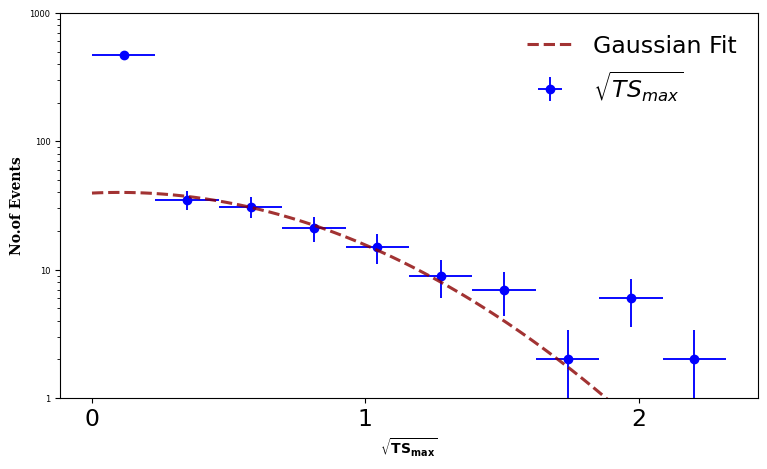

In [133]:

plt.figure(figsize=(9,5))
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], fontsize=17)
plt.yscale('log')
plt.yticks([1, 10, 100, 1000, 10000], [1, 10, 100, 1000, 10000], fontsize=6)
plt.ylim(1, 1000)
plt.errorbar(x, binnedsts, xerr=xerr,yerr=yerr,  aa = True, barsabove = True, fmt='ob',ecolor='blue', elinewidth=1.35, label='$\sqrt{TS_{max}}$')
plt.plot(gx,gaussian(gx, gparam[0], gparam[1]),'--', alpha=0.8, label=f'Gaussian Fit', color='darkred', lw=2.2)

plt.xlabel("$\mathbf{\sqrt{TS_{max}}}$", fontweight='bold', fontdict=font)
plt.ylabel("No.of Events", fontweight='bold', fontdict=font)
#plt.grid(True, which='major')
legend =plt.legend(prop={'size':17}, framealpha=0)
legend.get_frame().set_facecolor('none')
#plt.savefig("outputs/sqrt(TSmax)final.jpg")
plt.show()



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


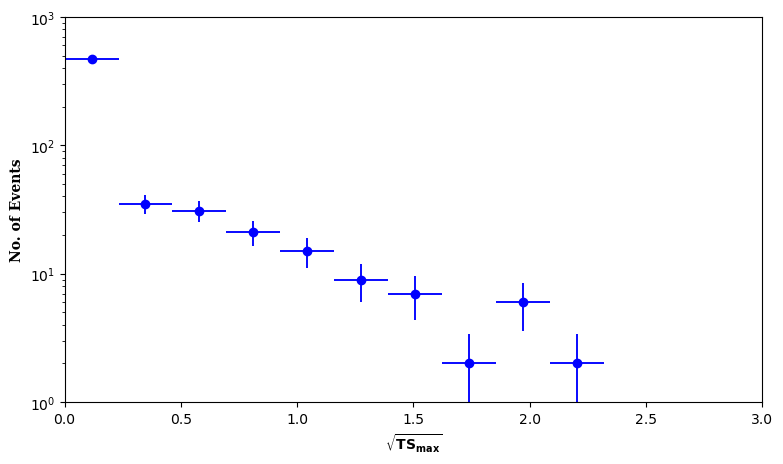

In [48]:
plt.figure(figsize=(9,5))
#plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], fontsize=17)
plt.xlim(0,3)
plt.yscale('log')
#plt.yticks([1, 10, 100, 1000], [1, 10, 100, 1000], fontsize=6)
plt.ylim(1, 1000)  # Setting the y-axis limits

plt.errorbar(x, binnedsts, xerr=xerr, yerr=yerr, aa=True, barsabove=True, fmt='ob', ecolor='blue', elinewidth=1.35)

plt.xlabel("$\mathbf{\sqrt{TS_{max}}}$", fontweight='bold', fontdict=font)
plt.ylabel("No. of Events", fontweight='bold', fontdict=font)

legend = plt.legend(prop={'size':17}, framealpha=0)
legend.get_frame().set_facecolor('none')

plt.show()
